In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

In this notebook, we are going to try to predict a sale price of a home! You are going to use your domain knowledge of what makes houses more or less expensive to determine which columns will predict house price more accurately.

### The dataset

import housing.csv file

In [23]:
housing = 
housing.head()

In [7]:
housing

,Land Square Feet,Central Heating,Other Heating,Central Air,Fireplaces,Construction Quality,Site Desirability,Porch,Building Square Feet,Repair Condition,Estimate (Land),Estimate (Building),Sale Price,Age,O'Hare Noise,Sale Year,Garage Indicator,Bedrooms,Bathrooms
0,3780.0,2.0,5.0,0.0,1.0,2.0,2.0,1,997.0,2.0,49140,177500,285000,96,0.0,2018,1.0,3,1
1,4375.0,1.0,5.0,0.0,0.0,2.0,2.0,3,907.0,2.0,26250,63470,22000,112,0.0,2016,1.0,3,1
2,4375.0,1.0,5.0,1.0,1.0,2.0,2.0,3,1174.0,2.0,29530,194430,225000,63,0.0,2013,1.0,3,1
3,8400.0,2.0,5.0,0.0,0.0,2.0,2.0,3,949.0,2.0,23100,30160,22600,63,0.0,2016,1.0,2,1
4,10890.0,1.0,5.0,1.0,0.0,2.0,2.0,3,1734.0,2.0,35390,65450,100000,109,0.0,2017,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158317,4375.0,1.0,5.0,0.0,0.0,2.0,2.0,3,910.0,2.0,19680,86190,37100,58,0.0,2014,1.0,2,1
158318,16509.0,1.0,5.0,1.0,1.0,2.0,2.0,1,2005.0,2.0,297160,203580,225000,93,0.0,2019,1.0,4,1
158319,3810.0,1.0,5.0,1.0,0.0,2.0,2.0,3,912.0,2.0,26670,81250,135000,59,0.0,2014,1.0,3,2
158320,6650.0,1.0,5.0,0.0,0.0,2.0,2.0,3,1203.0,2.0,44880,231940,392000,60,0.0,2018,1.0,3,1


remove the "Unnamed: 0" column from the data table

Grab a feature from the table above and plot the histogram of that feature

We will be using house price data from Chicago. Looking at the data might be a bit confusing, but feel free to ask us any questions. Some columns (like "Central Air" and "Fireplaces") only consist of 1's and 0's. A 0 means that the house DOES NOT have a fire place, and a 1 means that the house DOES have a fireplace. 

### The features

In [17]:
housing.columns.to_list()

['Land Square Feet',
 'Central Heating',
 'Other Heating',
 'Central Air',
 'Fireplaces',
 'Construction Quality',
 'Site Desirability',
 'Porch',
 'Building Square Feet',
 'Repair Condition',
 'Estimate (Land)',
 'Estimate (Building)',
 'Sale Price',
 'Age',
 "O'Hare Noise",
 'Sale Year',
 'Garage Indicator',
 'Bedrooms',
 'Bathrooms']

Which features stick out to you as being helpful in predicting sale price? Choose three features.

## Correlation of the features and 

The chart below shows the correlations between GPA and other features in the table. Use the chart to answer the questions about the relationships between these variables.

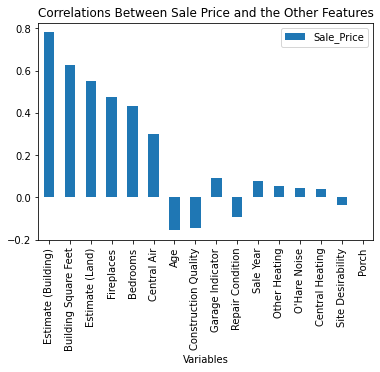

In [ ]:
housing_corr = housing[housing.columns[1:]].corr()['Sale Price'][:-1].to_frame().reset_index().rename(columns={"index": "Variables", "Sale Price": "Sale_Price"})
housing_corr = housing_corr.drop(11)
housing_corr = housing_corr.reindex(housing_corr.Sale_Price.abs().sort_values(ascending=False).index)
housing_corr.plot.bar(x='Variables', y='Sale_Price', rot=90, title="Correlations Between Sale Price and the Other Features");

Now looking at the features and their correlation with Sale Price, which features do you think would be helpful in your model? Choose 3 features.

## Machine Learning

In [ ]:
housing

,Land Square Feet,Central Heating,Other Heating,Central Air,Fireplaces,Construction Quality,Site Desirability,Porch,Building Square Feet,Repair Condition,Estimate (Land),Estimate (Building),Sale Price,Age,O'Hare Noise,Sale Year,Garage Indicator,Bedrooms,Bathrooms
0,3780.0,2.0,5.0,0.0,1.0,2.0,2.0,1,997.0,2.0,49140,177500,285000,96,0.0,2018,1.0,3,1
1,4375.0,1.0,5.0,0.0,0.0,2.0,2.0,3,907.0,2.0,26250,63470,22000,112,0.0,2016,1.0,3,1
2,4375.0,1.0,5.0,1.0,1.0,2.0,2.0,3,1174.0,2.0,29530,194430,225000,63,0.0,2013,1.0,3,1
3,8400.0,2.0,5.0,0.0,0.0,2.0,2.0,3,949.0,2.0,23100,30160,22600,63,0.0,2016,1.0,2,1
4,10890.0,1.0,5.0,1.0,0.0,2.0,2.0,3,1734.0,2.0,35390,65450,100000,109,0.0,2017,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158317,4375.0,1.0,5.0,0.0,0.0,2.0,2.0,3,910.0,2.0,19680,86190,37100,58,0.0,2014,1.0,2,1
158318,16509.0,1.0,5.0,1.0,1.0,2.0,2.0,1,2005.0,2.0,297160,203580,225000,93,0.0,2019,1.0,4,1
158319,3810.0,1.0,5.0,1.0,0.0,2.0,2.0,3,912.0,2.0,26670,81250,135000,59,0.0,2014,1.0,3,2
158320,6650.0,1.0,5.0,0.0,0.0,2.0,2.0,3,1203.0,2.0,44880,231940,392000,60,0.0,2018,1.0,3,1


Create a python list of the columns you think will be most helpful. Choose 7. Make sure you write them exactly how they are writtin in the table above.

*Make sure you DO NOT use Sale Price as one of your columns*!


In [18]:
# Example: best columns = ["Central Heating", "Other Heating", "Porch", "Estimate (Land), "Age", ...]
best_columns = []

In [19]:
model = lm.LinearRegression(fit_intercept=True)
X_train = housing[best_columns]
y_train = housing["Sale Price"]

In [20]:
model.fit(X_train, y_train)
model.predict(X_train)
housing["Predicted Sale Price"] = model.predict(X_train)

## Evaluating Our model

We can actually use our correlation coefficient to see the goodness of our model! Using the correlation coefficient, you can tell how strong the relationship is between the actual sale price and the predicted sale price.

In [21]:
print("Correlation coefficient: ", housing[housing.columns[1:]].corr()['Predicted Sale Price'][:-1]["Sale Price"])

Correlation coefficient:  0.7998114974338931


Use different columns and see how your correlation coefficient changes, aka how good your model is at predicting price.

Let's see who can get the highest correlation!